# Análise dos filmes que eu já vi

In [297]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('meus-filmes.csv')
df.head()

,Filme,País,Ano,Tempo,Meu_Rating,Outlier_t,Genero,Animação,Rating_Geral
0,The Cavalier’s Dream,USA,1898,1,3.0,1,Fantasia,0,2.9
1,Le Voyage dans la Lune,FRA,1902,15,4.0,1,Sci-fi,0,4.0
2,The Great Train Robbery,USA,1903,12,4.0,1,Western,0,3.5
3,The ‘?’ Motorist,GBR,1906,3,5.0,1,Fantasia,0,3.5
4,Das Cabinet des Dr. Caligari,GER,1920,78,5.0,0,Crime,0,4.1


### 2. Gráfico de filmes por país:

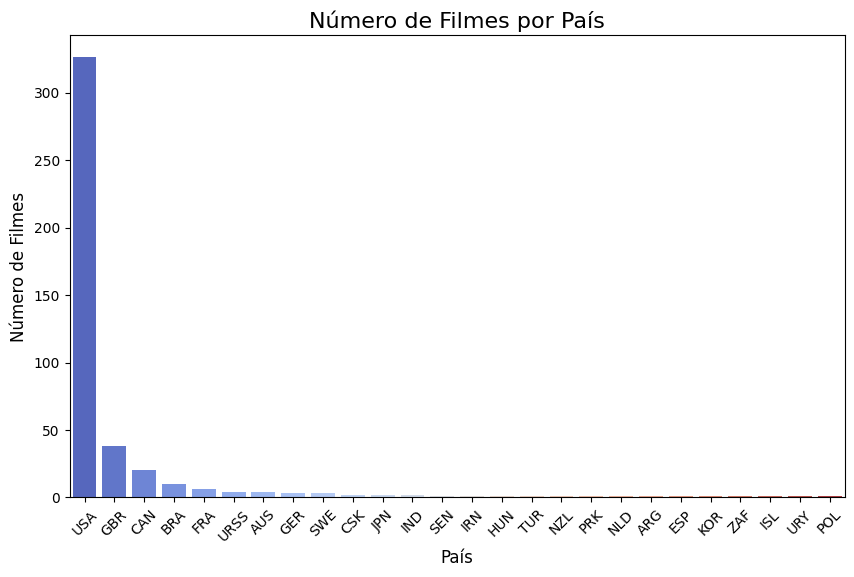

In [298]:
filmes_por_pais = df['País'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=filmes_por_pais.index, y=filmes_por_pais.values, palette='coolwarm', hue=filmes_por_pais.index, legend=False)
plt.title('Número de Filmes por País', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Número de Filmes', fontsize=12)
plt.xticks(rotation=45)
plt.show()

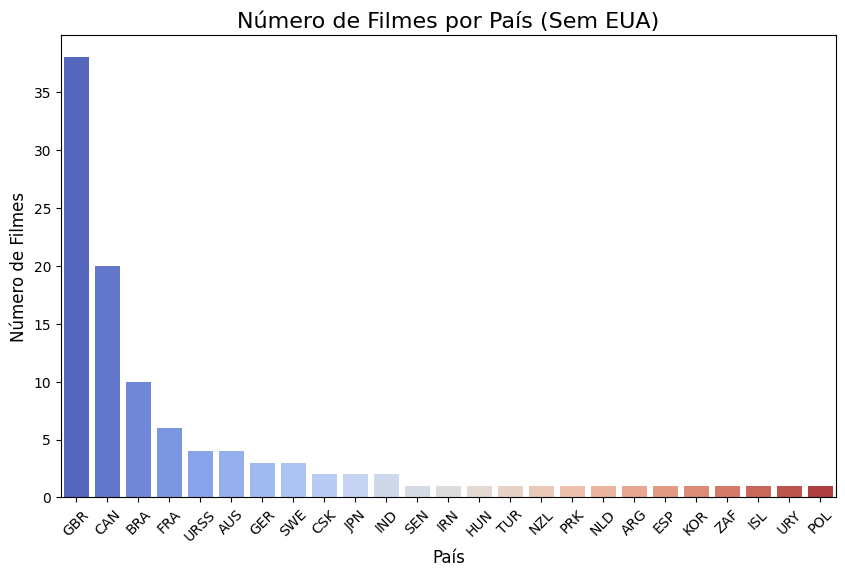

In [299]:
df_SEM_EUA = df[df['País'] != 'USA']
filmes_por_pais = df_SEM_EUA['País'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=filmes_por_pais.index, y=filmes_por_pais.values, palette='coolwarm', hue=filmes_por_pais.index, legend=False)
plt.title('Número de Filmes por País (Sem EUA)', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Número de Filmes', fontsize=12)
plt.xticks(rotation=45)
plt.show()


### 2. Distribuição da duração média dos filmes

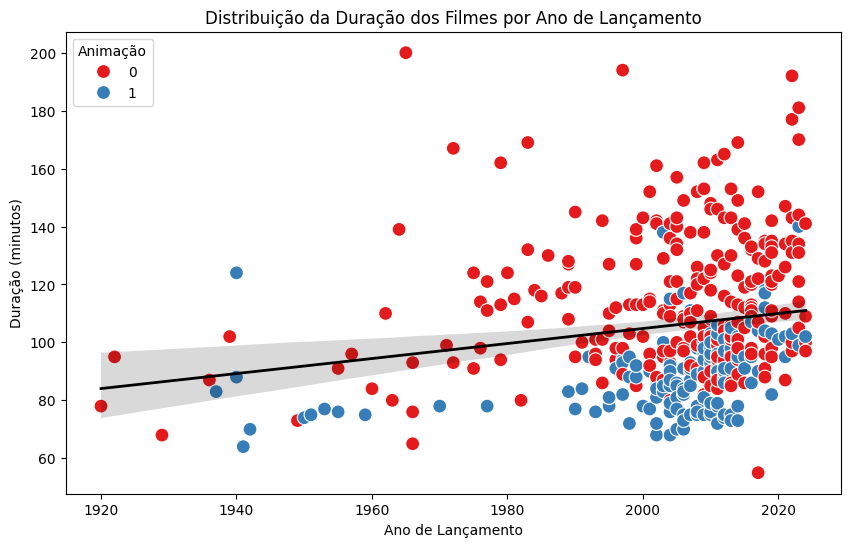

In [300]:
df_filtered = df[df['Outlier_t'] != True]
plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=df_filtered, x="Ano", y="Tempo", hue="Animação", palette="Set1", s=100)
sns.regplot(x='Ano', y='Tempo', data=df_filtered, scatter=False, color='black', line_kws={"linewidth": 2})
plt.title('Distribuição da Duração dos Filmes por Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Duração (minutos)')
plt.show()


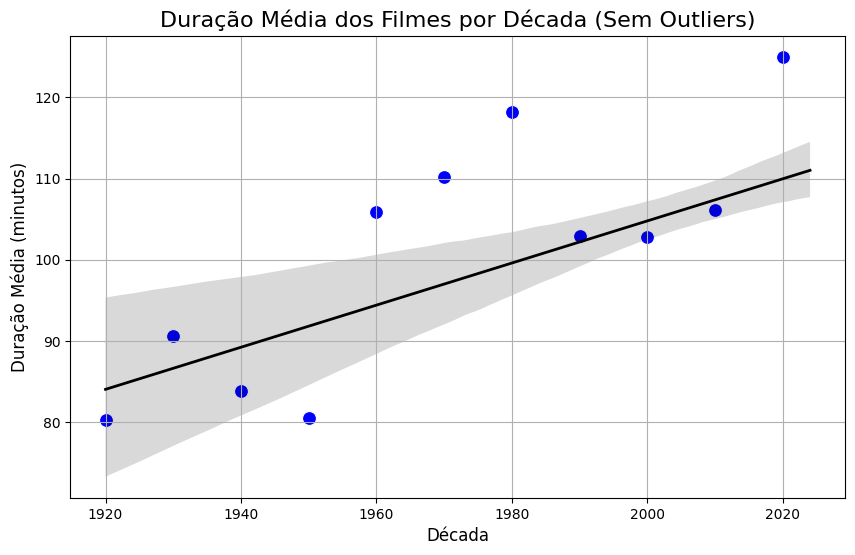

In [301]:
df['Década'] = (df['Ano'] // 10) * 10

df_sem_outliers = df[df['Outlier_t'] == 0]
duracao_media_decada = df_sem_outliers.groupby('Década')['Tempo'].mean()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=duracao_media_decada.index, y=duracao_media_decada.values, s=100, color='b')
sns.regplot(x='Ano', y='Tempo', data=df_sem_outliers, scatter=False, color='black', line_kws={"linewidth": 2})
plt.title('Duração Média dos Filmes por Década (Sem Outliers)', fontsize=16)
plt.xlabel('Década', fontsize=12)
plt.ylabel('Duração Média (minutos)', fontsize=12)
plt.grid(True)
plt.show()

### 3. Gráfico da quantidade de filmes assistidos por década

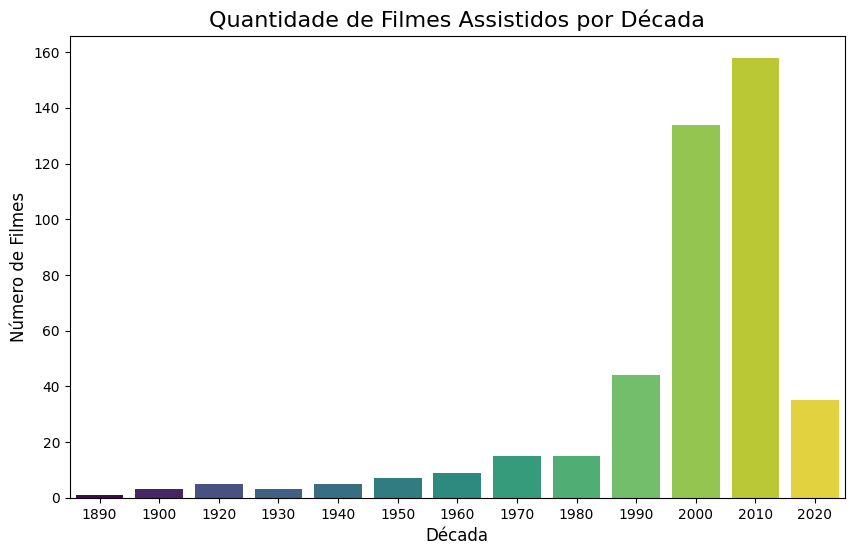

In [302]:
filmes_por_decada = df['Década'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=filmes_por_decada.index, y=filmes_por_decada.values, palette='viridis', hue=filmes_por_decada.index, legend=False)
plt.title('Quantidade de Filmes Assistidos por Década', fontsize=16)
plt.xlabel('Década', fontsize=12)
plt.ylabel('Número de Filmes', fontsize=12)
plt.show()

### 4. Média de rating por gênero

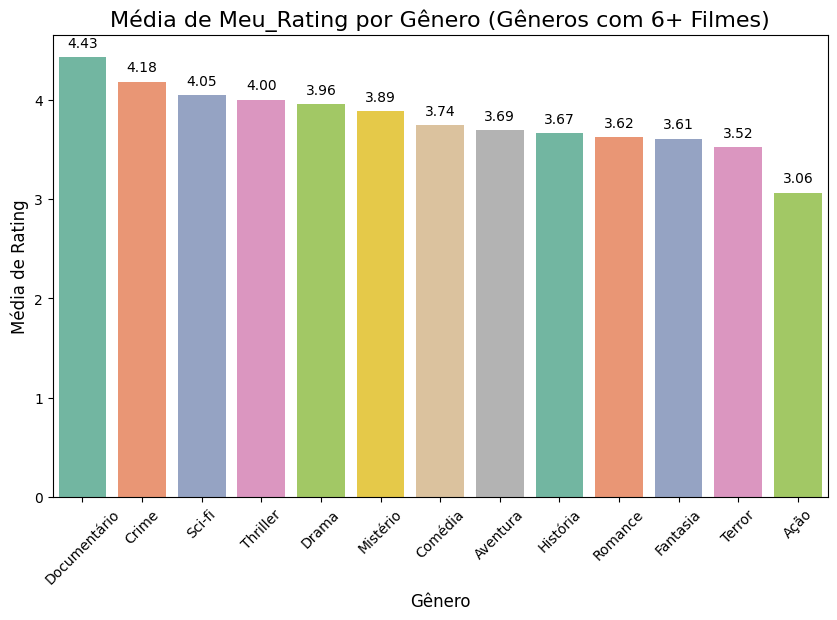

In [303]:
df_sem_na = df.dropna(subset=['Meu_Rating'])
contagem_generos = df_sem_na['Genero'].value_counts()
generos_suficientes = contagem_generos[contagem_generos >= 6].index # so generos com 6 ou ocorrencias
df_filtrado = df_sem_na[df_sem_na['Genero'].isin(generos_suficientes)]
media_rating_genero = df_filtrado.groupby('Genero')['Meu_Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=media_rating_genero.index, y=media_rating_genero.values, palette='Set2', hue=media_rating_genero.index, legend=False)
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', label_type='edge', padding=5)

plt.title('Média de Meu_Rating por Gênero (Gêneros com 6+ Filmes)', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Média de Rating', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### 5. Proporção de filmes que são animação

In [304]:
proporcao_animacao = df['Animação'].mean() * 100
print(f"Proporção de filmes que são animação: {proporcao_animacao:.2f}%")

Proporção de filmes que são animação: 35.71%


In [305]:
comparacao_animacao = df.groupby('Animação')[['Tempo', 'Meu_Rating', 'Rating_Geral']].mean()

print(comparacao_animacao)


               Tempo  Meu_Rating  Rating_Geral
Animação                                      
0         111.293907    3.722868      3.506475
1          89.541935    3.720690      3.450968


### 6. Distribuição da Duração dos Filmes (Histograma)
Entender a tendêndia de duração dos filmes que eu vejo. Aqui, podemos observar uma distribuição normal, com filmes próximos a 100 minutos sendo os mais comuns e filmes muito longos ou muito curtos aparecendo menos vezes.

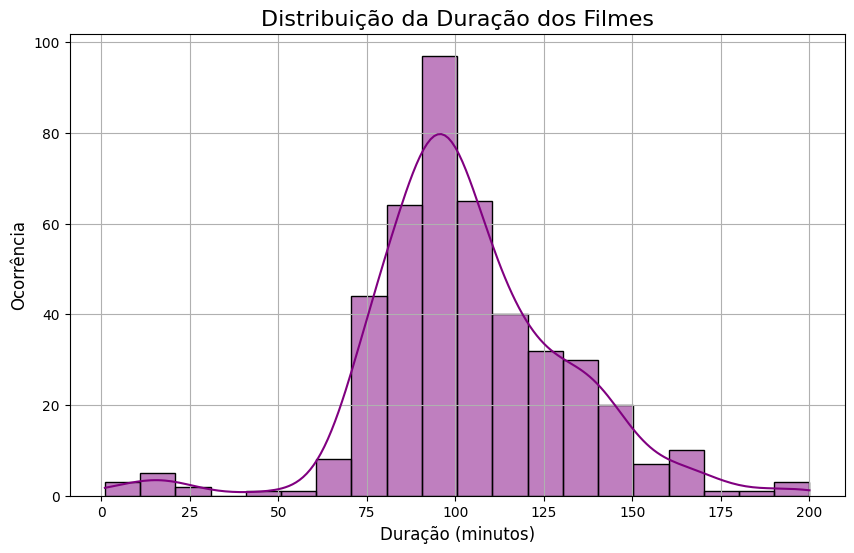

In [306]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Tempo'], bins=20, kde=True, color='purple')
plt.title('Distribuição da Duração dos Filmes', fontsize=16)
plt.xlabel('Duração (minutos)', fontsize=12)
plt.ylabel('Ocorrência', fontsize=12)
plt.grid(True)
plt.show()


In [307]:
from scipy import stats

stat, p_value = stats.shapiro(df['Tempo'])
print(f"Estatística: {stat}, Valor-p: {p_value}")


Estatística: 0.9504194222083524, Valor-p: 6.936380148224576e-11


### 7. Correlações entre Duração, Meu_Rating e Rating_Geral

Não há correlação com o meu rating e o tempo do filme.
Há uma forte correlação entre o meu rating e o rating geral, isso signifca que eu tendo a concordar com o rating geral.

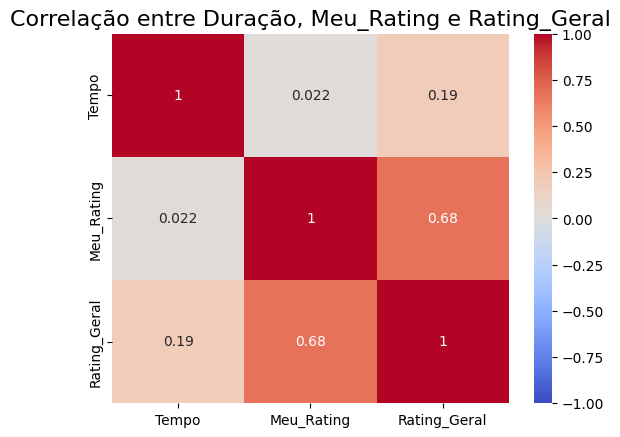

In [308]:
correlacoes = df[['Tempo', 'Meu_Rating', 'Rating_Geral']].corr()
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação entre Duração, Meu_Rating e Rating_Geral', fontsize=16)
plt.show()

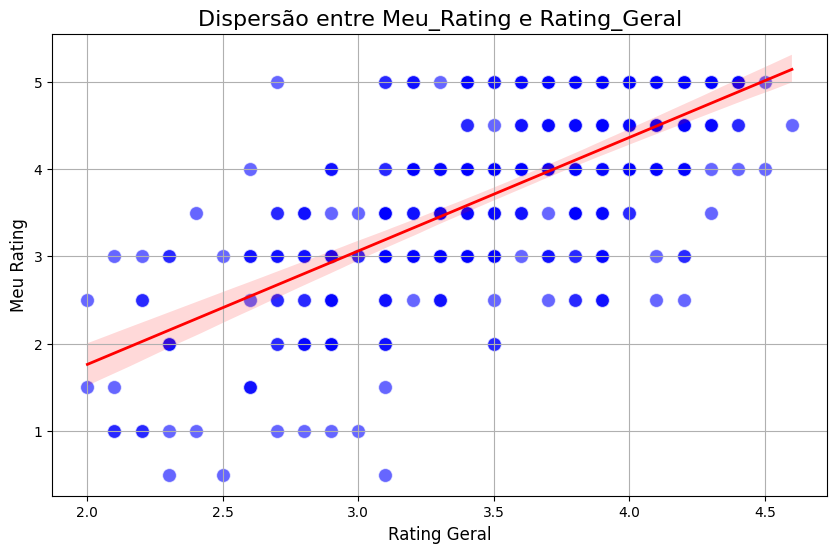

In [309]:
df_sem_na = df.dropna(subset=['Meu_Rating', 'Rating_Geral'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating_Geral', y='Meu_Rating', data=df_sem_na, color='blue', s=100, alpha=0.6)

sns.regplot(x='Rating_Geral', y='Meu_Rating', data=df_sem_na, scatter=False, color='red', line_kws={"linewidth": 2})

plt.title('Dispersão entre Meu_Rating e Rating_Geral', fontsize=16)
plt.xlabel('Rating Geral', fontsize=12)
plt.ylabel('Meu Rating', fontsize=12)
plt.grid(True)
plt.show()

## 8. Média de Rating por País

(OBS: eu vi poucos filmes que nao são dos EUA, mas com o tempo esse gráfico pode ficar mais interessante se eu assistir mais coisa)

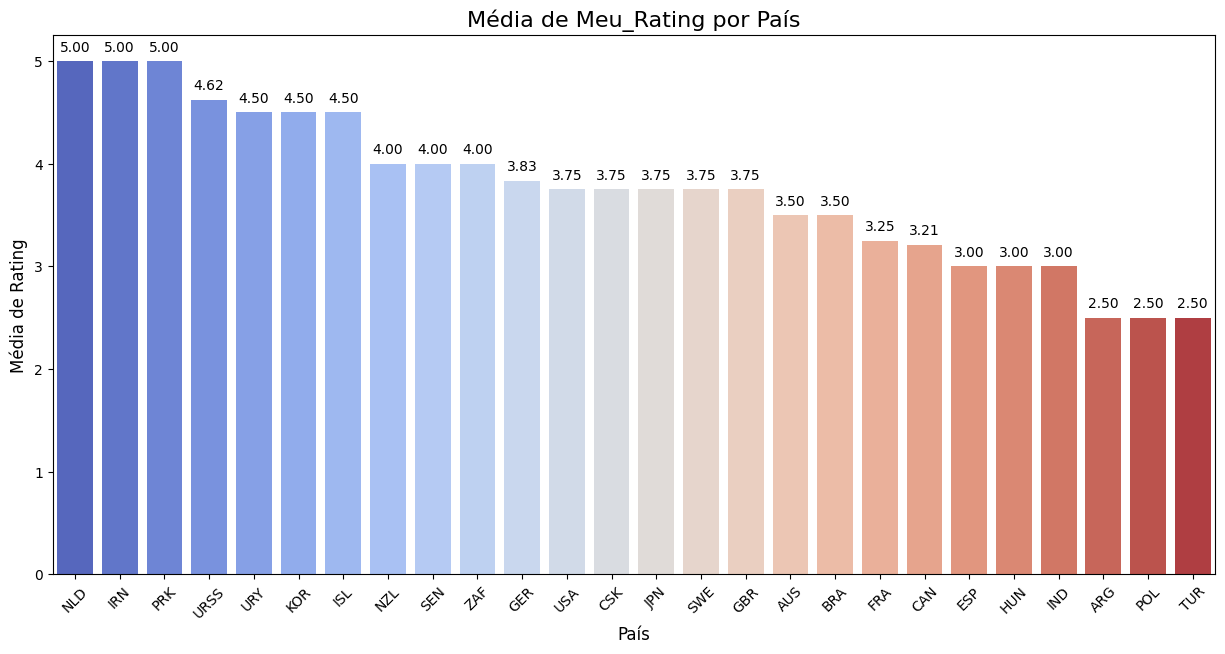

In [322]:
media_rating_pais = df.groupby('País')['Meu_Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 7))
ax = sns.barplot(x=media_rating_pais.index, y=media_rating_pais.values, palette='coolwarm', hue=media_rating_pais.index) 
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', label_type='edge', padding=5)

plt.title('Média de Meu_Rating por País', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Média de Rating', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Média de tempo de duração de filme por país:

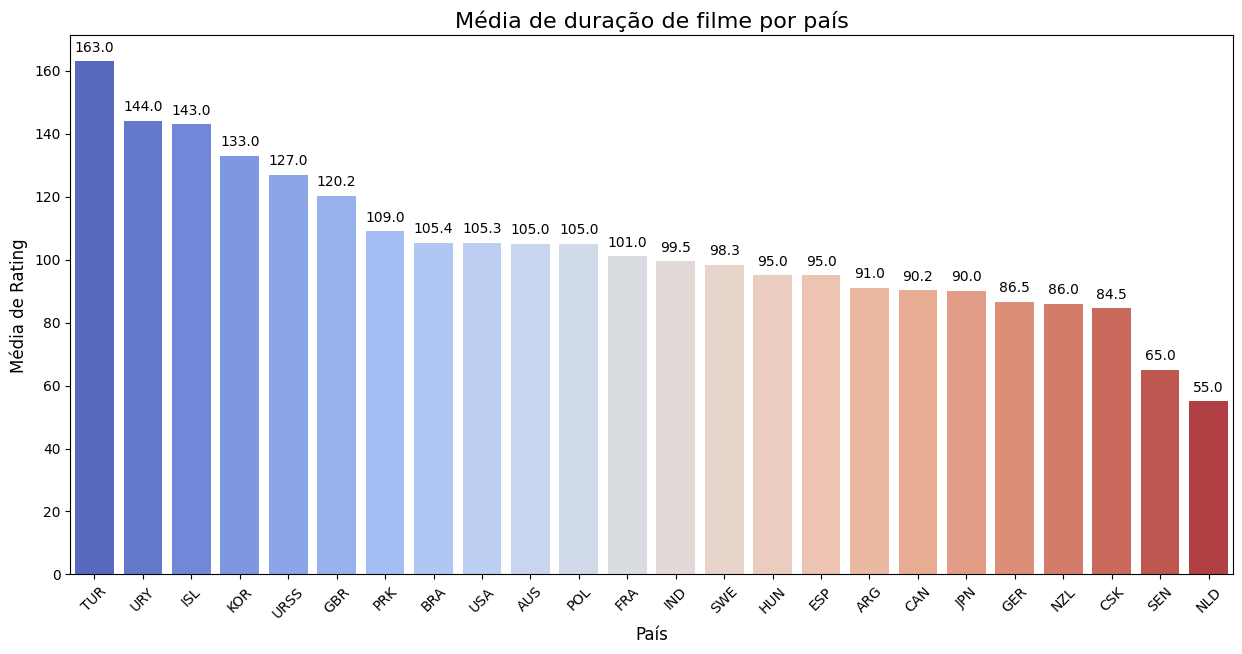

In [324]:
df_sem_outliers = df[df['Outlier_t'] == 0]
media_tempo_pais = df_sem_outliers.groupby('País')['Tempo'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 7))
ax = sns.barplot(x=media_tempo_pais.index, y=media_tempo_pais.values, palette='coolwarm', hue=media_tempo_pais.index) 
for i in ax.containers:
    ax.bar_label(i, fmt='%.1f', label_type='edge', padding=5)

plt.title('Média de duração de filme por país', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Média de Rating', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## 9. Distribuição de Gêneros Assistidos

Gêneros agrupados em 'Outros':
  - Crime: 2.53%
  - Mistério: 2.30%
  - Documentário: 1.84%
  - História: 1.61%
  - Musical: 1.38%
  - Guerra: 0.69%
  - Western: 0.46%


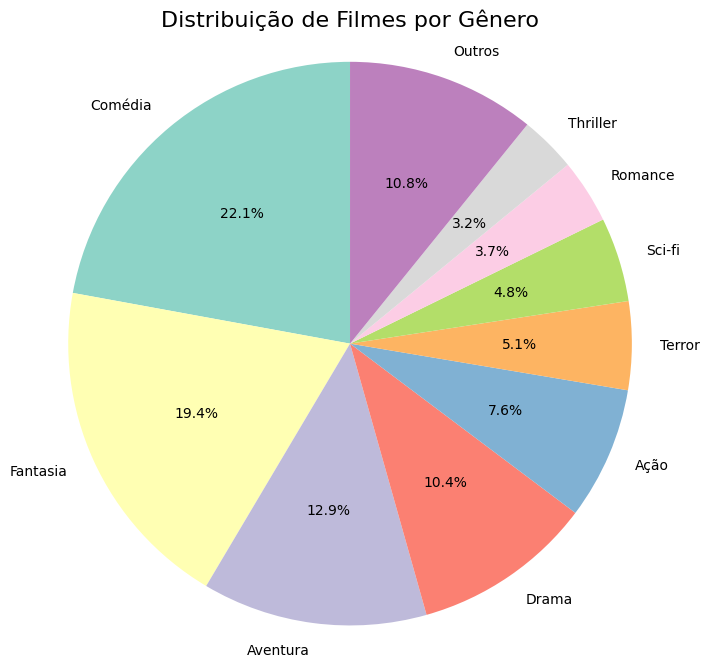

In [311]:
filmes_por_genero = df['Genero'].value_counts()
percentual_genero = filmes_por_genero / filmes_por_genero.sum() * 100
generos_outros = percentual_genero[percentual_genero < 3]

print("Gêneros agrupados em 'Outros':")
for genero, percentual in generos_outros.items():
    print(f"  - {genero}: {percentual:.2f}%")

genero_modificado = percentual_genero.copy()
genero_modificado[percentual_genero < 3] = 0 # remover os generos q tenham menos de 3% senao o gráfico de pizza fica horroroso
genero_modificado['Outros'] = percentual_genero[percentual_genero < 3].sum()
genero_modificado = genero_modificado[genero_modificado > 0]

plt.figure(figsize=(8, 8))
plt.pie(genero_modificado.values, labels=genero_modificado.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Distribuição de Filmes por Gênero', fontsize=16)
plt.axis('equal')
plt.show()


### 10. Filmes Mais Longos/Mais Curtos por Gênero

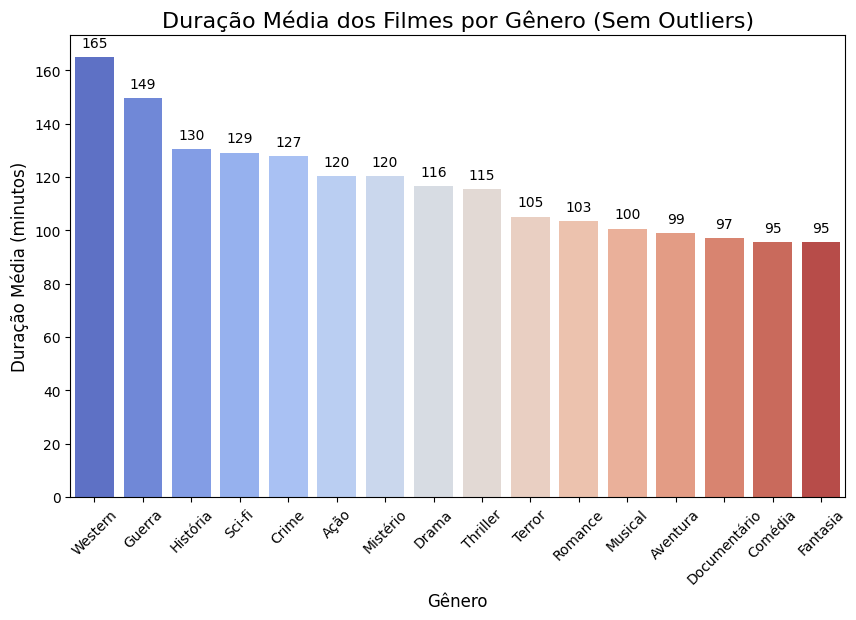

In [312]:
df_sem_outliers = df[df['Outlier_t'] == 0]
duracao_genero_sem_outliers = df_sem_outliers.groupby('Genero')['Tempo'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=duracao_genero_sem_outliers.index, y=duracao_genero_sem_outliers.values, palette='coolwarm', hue=duracao_genero_sem_outliers.index, legend=False)
for i in ax.containers:
    ax.bar_label(i, fmt='%d', label_type='edge', padding=5)

plt.title('Duração Média dos Filmes por Gênero (Sem Outliers)', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Duração Média (minutos)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


### 11. Evolução dos Ratings ao Longo do Tempo

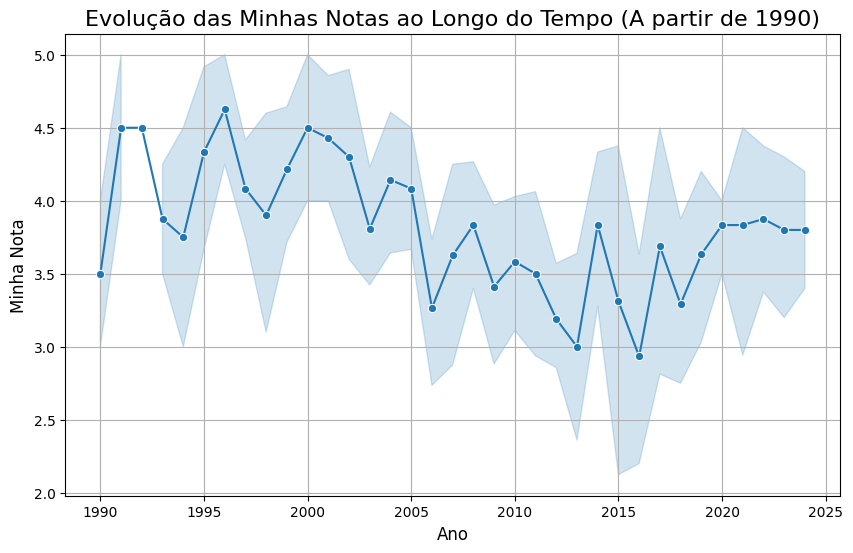

In [318]:
df_pos_1960 = df[df['Ano'] >= 1990]

plt.figure(figsize=(10, 6))
sns.lineplot(x='Ano', y='Meu_Rating', data=df_pos_1960, marker='o')
plt.title('Evolução das Minhas Notas ao Longo do Tempo (A partir de 1990)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Minha Nota', fontsize=12)
plt.grid(True)
plt.show()


### 12. Top Filmes Baseado em Rating Geral

In [314]:
top_filmes = df.sort_values(by='Rating_Geral', ascending=False).head(15)
print(top_filmes[['Filme', 'Rating_Geral', 'Meu_Rating', 'País']])

                                   Filme  Rating_Geral  Meu_Rating  País
394                             Parasite           4.6         4.5   KOR
64                            GoodFellas           4.5         4.0   USA
207               O Cavaleiro das Trevas           4.5         5.0   USA
48               The Empire Strikes Back           4.4         5.0   USA
47                               Сталкер           4.4         4.5  URSS
321                             Whiplash           4.4         5.0   USA
335                         Interstellar           4.4         5.0   GBR
381    Spider-Man: Into the Spider-Verse           4.4         5.0   USA
44                            The Ascent           4.4         5.0  URSS
6                           Sherlock Jr.           4.4         5.0   USA
421  Spider-Man: Across the Spider-Verse           4.4         4.0   USA
92                          Perfect Blue           4.4         4.5   JPN
302                     Django Unchained           

In [315]:
rating_geral_mais_alto = df['Rating_Geral'].max()
rating_geral_mais_baixo = df['Rating_Geral'].min()
filmes_rating_geral_alto = df[df['Rating_Geral'] == rating_geral_mais_alto]
filmes_rating_geral_baixo = df[df['Rating_Geral'] == rating_geral_mais_baixo]

print("Filmes com o Rating_Geral mais alto:")
for index, row in filmes_rating_geral_alto.iterrows():
    print(f"  - {row['Filme']} ({row['Ano']}) - Meu Rating: {row['Meu_Rating']}, Rating Geral: {row['Rating_Geral']}")
print("\nFilmes com o Rating_Geral mais baixo:")

for index, row in filmes_rating_geral_baixo.iterrows():
    print(f"  - {row['Filme']} ({row['Ano']}) - Meu Rating: {row['Meu_Rating']}, Rating Geral: {row['Rating_Geral']}")

Filmes com o Rating_Geral mais alto:
  - Parasite (2019) - Meu Rating: 4.5, Rating Geral: 4.6

Filmes com o Rating_Geral mais baixo:
  - Pocahontas II: Journey to a New World (1998) - Meu Rating: 2.5, Rating Geral: 2.0
  - O Corcunda de Notre Dame 2 (2002) - Meu Rating: nan, Rating Geral: 2.0
  - The Smurfs 2 (2013) - Meu Rating: 1.5, Rating Geral: 2.0


In [316]:
meu_rating_mais_alto = df['Meu_Rating'].max()
meu_rating_mais_baixo = df['Meu_Rating'].min()
filmes_meu_rating_alto = df[(df['Meu_Rating'] == meu_rating_mais_alto) & (df['Rating_Geral'] > 4)]
filmes_meu_rating_baixo = df[df['Meu_Rating'] == meu_rating_mais_baixo]

print("\nFilmes com o Meu_Rating mais alto:")
for index, row in filmes_meu_rating_alto.iterrows():
    print(f"  - {row['Filme']} ({row['Ano']}) - Meu Rating: {row['Meu_Rating']}, Rating Geral: {row['Rating_Geral']}")

print("\nFilmes com o Meu_Rating mais baixo:")
for index, row in filmes_meu_rating_baixo.iterrows():
    print(f"  - {row['Filme']} ({row['Ano']}) - Meu Rating: {row['Meu_Rating']}, Rating Geral: {row['Rating_Geral']}")


Filmes com o Meu_Rating mais alto:
  - Das Cabinet des Dr. Caligari (1920) - Meu Rating: 5.0, Rating Geral: 4.1
  - Sherlock Jr. (1924) - Meu Rating: 5.0, Rating Geral: 4.4
  - Modern Times (1936) - Meu Rating: 5.0, Rating Geral: 4.3
  - The House Is Black (1963) - Meu Rating: 5.0, Rating Geral: 4.3
  - Monty Python and the Holy Grail (1975) - Meu Rating: 5.0, Rating Geral: 4.1
  - The Ascent (1977) - Meu Rating: 5.0, Rating Geral: 4.4
  - The Empire Strikes Back (1980) - Meu Rating: 5.0, Rating Geral: 4.4
  - Back to the Future (1985) - Meu Rating: 5.0, Rating Geral: 4.2
  - Indiana Jones and the Last Crusade (1989) - Meu Rating: 5.0, Rating Geral: 4.1
  - Forrest Gump (1994) - Meu Rating: 5.0, Rating Geral: 4.1
  - Se7en (1995) - Meu Rating: 5.0, Rating Geral: 4.3
  - Mulan (1998) - Meu Rating: 5.0, Rating Geral: 4.1
  - The Matrix (1999) - Meu Rating: 5.0, Rating Geral: 4.2
  - Clube da Luta (1999) - Meu Rating: 5.0, Rating Geral: 4.3
  - Shrek (2001) - Meu Rating: 5.0, Rating Gera